In [1]:
import pandas as pd
import numpy as np

In [2]:
df_ratings = pd.read_csv("./data/ratings_small.csv")
df_metadata = pd.read_csv("./data/movies_metadata.csv")
df_keywords = pd.read_csv("./data/keywords.csv")
df_metadata['id'] = pd.to_numeric(df_metadata['id'], errors='coerce', downcast='integer')
df_movies = pd.merge(df_metadata, df_keywords, how='outer', on='id')

movies_columns= ['adult', 'budget', 'genres', 'id', 'original_language', 'keywords',
                'popularity', 'production_countries', 'revenue', 'runtime', 'title',
                'spoken_languages', 'status', 'video', 'vote_average', 'vote_count']

df_movies = df_movies[movies_columns]

df_movies['video']= np.where(df_movies['video']==True, 1, 0)
df_movies['adult']= np.where(df_movies['adult']==True, 1, 0)

In [3]:
import ast
def modify_prod_country(x):
    try:
        country= [i['iso_3166_1'] for i in ast.literal_eval(x)][0]
    except:
        return 'NaN'
    return country

df_movies['production_countries'] = df_movies['production_countries'].apply(modify_prod_country)

def modify_language(x):
    try:
        lang= [i['iso_639_1'] for i in ast.literal_eval(x)][0]
    except:
        return 'NaN'
    return lang

df_movies['spoken_languages'] = df_movies['spoken_languages'].apply(modify_language)

df_movies.head(1)

,adult,budget,genres,id,original_language,keywords,popularity,production_countries,revenue,runtime,title,spoken_languages,status,video,vote_average,vote_count
0,0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,en,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",21.9469,US,373554033.0,81.0,Toy Story,en,Released,0,7.7,5415.0


In [4]:
def modify(x):
    key = [i['name'] for i in ast.literal_eval(x)]
    return key

df_movies['genre_modified'] = df_movies['genres'].apply(modify)

all_genre = []
for i in df_movies['genre_modified']:
    for j in i:
        all_genre.append(j)
        
new_genre_cols = list(set(all_genre))

for col in new_genre_cols:
    df_movies[col] = 0
    
for i in new_genre_cols:
    df_movies.loc[df_movies['genre_modified'].apply(lambda x: True if i in x else False), i]=1
    
df_movies.drop(['genres', 'genre_modified'], axis=1, inplace=True)

In [5]:
df_movies.head(1)

,adult,budget,id,original_language,keywords,popularity,production_countries,revenue,runtime,title,...,Documentary,BROSTA TV,Action,TV Movie,Carousel Productions,Western,Music,Science Fiction,The Cartel,Animation
0,0,30000000,862.0,en,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",21.9469,US,373554033.0,81.0,Toy Story,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df_movies.dropna(inplace=True, axis=0)
df_movies = df_movies.rename(columns={'id':'movieId'})
df_movies['movieId'] = df_movies['movieId'].astype(int)
# df_ratings['movieId'] = df_ratings['movieId'].astype(int)

from sklearn.preprocessing import LabelEncoder

char_cols= ['original_language', 'production_countries', 'spoken_languages', 'status', 'video']
for col in char_cols:
    le = LabelEncoder()
    le.fit(list(df_movies[col]))
    df_movies[col]= le.transform(list(df_movies[col]))
df_movies.head(1)

,adult,budget,movieId,original_language,keywords,popularity,production_countries,revenue,runtime,title,...,Documentary,BROSTA TV,Action,TV Movie,Carousel Productions,Western,Music,Science Fiction,The Cartel,Animation
0,0,30000000,862,17,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",21.9469,134,373554033.0,81.0,Toy Story,...,0,0,0,0,0,0,0,0,0,1


In [7]:
df_movies['keyword_modified'] = df_movies['keywords'].apply(modify)

all_keyword = []
for i in df_movies['keyword_modified']:
    for j in i:
        all_keyword.append(j)

str_keywords = " ".join(all_keyword)

In [8]:
dict = {}
words = all_keyword
for w in words:
    if w in dict:
        dict[w] += 1
    else:
        dict[w] = 1

lst = [(dict[w], w) for w in dict]
lst.sort()
lst.reverse()
print('前10名出现次数最多的单词和次数是：')
i = 1
for count, word in lst[:10]:
	print("'%d %4d %s'" % (i, count, word))
	i += 1

前10名出现次数最多的单词和次数是：
'1 3111 woman director'
'2 1928 independent film'
'3 1310 murder'
'4  835 based on novel'
'5  733 musical'
'6  684 sex'
'7  651 violence'
'8  636 nudity'
'9  633 biography'
'10  626 revenge'


Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

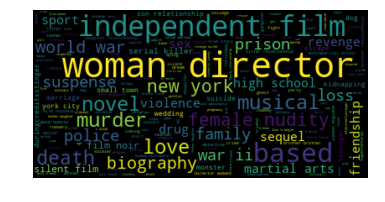

In [9]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(str_keywords)

%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [10]:
new_keyword_cols = [word for count, word in lst[:10]]
for col in new_keyword_cols:
    df_movies[col] = 0
for i in new_keyword_cols:
    df_movies.loc[df_movies['keyword_modified'].apply(lambda x: True if i in x else False), i]=1
df_movies.drop(['keywords', 'keyword_modified'], axis=1, inplace=True)
df_movies.head(1)

,adult,budget,movieId,original_language,popularity,production_countries,revenue,runtime,title,spoken_languages,...,woman director,independent film,murder,based on novel,musical,sex,violence,nudity,biography,revenge
0,0,30000000,862,17,21.9469,134,373554033.0,81.0,Toy Story,26,...,0,0,0,0,0,0,0,0,0,0


In [15]:
id_title = {}
for i, r in df_movies.iterrows():
    id_title[r['movieId']] = r['title']

In [12]:
df_ratings.drop(['timestamp'], axis=1, inplace=True)
df_ratings['movieId'] = df_ratings['movieId'].astype(int)
df_ratings.head(1)

,userId,movieId,rating
0,1,31,2.5


In [16]:
movie_id = list(df_movies['movieId'])
user_id = list(df_ratings['userId'])
len(id_title)

45084

In [18]:
len(movie_id)

46125